In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
df=pd.read_csv("mpii_dataset.csv")

In [3]:
df=df[:3000]
print(df.shape)

(3000, 37)


(1080, 1920, 3)
(1080, 1920)
27771.428571428572


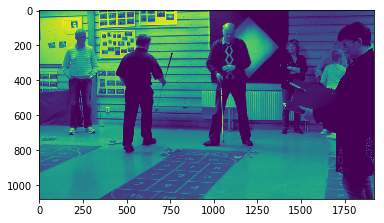

In [5]:
# img=Image.open('../MPII/000003072.jpg')
img = cv2.imread('../MPII/MPII/000025245.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(img.shape)
print(gray.shape)
plt.imshow(gray)
imsize=np.array(img.size)
fact=imsize/224.0
print(fact)

In [8]:
def pix1(ix):
    img = df['NAME'][ix]
    print(img)
    

    im = Image.open('../MPII/MPII/'+img)
    img =cv2.imread('../MPII/MPII/'+img)
    img_c = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    res = cv2.resize(img_c,(224,224))
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
#     implot = plt.imshow(im2)
    implot2 = plt.imshow(res)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    
    px=2
    kx=ix
    while px <34:
        col = df.columns[px]
        x = df[col][ix]
        col = df.columns[px+1]
        y = df[col][ix]
        print(col,x,y)
        #plt.scatter([[x]],[[y]])
        px=px+2
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][kx]/fact[0]
        col=df.columns[cx+1]
        y=df[col][kx]/fact[1]
        print(col,x,y)
        plt.scatter([[x]],[[y]])
        cx+=2
    plt.show()
    

094045858.jpg
[5.71428571 3.21428571]
('r ankle_Y', -1, -1)
('r knee_Y', -1, -1)
('r hip_Y', 893, 409)
('l hip_Y', 747, 438)
('l knee_Y', 570, 489)
('l ankle_Y', 553, 668)
('pelvis_Y', 820, 424)
('thorax_Y', 793, 209)
('upper neck_Y', 789.2951, 190.105)
('head top_Y', 766.7049, 74.895)
('r wrist_Y', 947, 410)
('r elbow_Y', 930, 332)
('r shoulder_Y', 857, 207)
('l shoulder_Y', 728, 211)
('l elbow_Y', 671, 318)
('l wrist_Y', 532, 358)
('r ankle_Y', -0.175, -0.3111111111111111)
('r knee_Y', -0.175, -0.3111111111111111)
('r hip_Y', 156.275, 127.24444444444444)
('l hip_Y', 130.725, 136.26666666666665)
('l knee_Y', 99.75, 152.13333333333333)
('l ankle_Y', 96.77499999999999, 207.82222222222222)
('pelvis_Y', 143.5, 131.9111111111111)
('thorax_Y', 138.775, 65.02222222222223)
('upper neck_Y', 138.1266425, 59.14377777777777)
('head top_Y', 134.17335749999998, 23.300666666666665)
('r wrist_Y', 165.725, 127.55555555555556)
('r elbow_Y', 162.75, 103.28888888888889)
('r shoulder_Y', 149.975, 64.39999

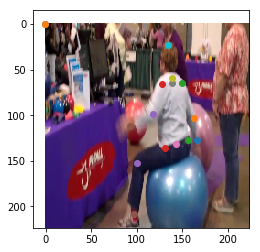

In [9]:
pix1(178)

In [18]:
import os
import cv2
import h5py
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [19]:
from PIL import Image
from pathlib import Path
from keras.models import Sequential,Model
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16,preprocess_input

In [20]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [21]:
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D,GlobalAveragePooling2D

In [22]:
from keras.layers import GlobalMaxPool2D
from keras import backend as K
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler

In [23]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
color=sns.color_palette()
%matplotlib inline

In [24]:
def step_decay(epoch):
    initial_rate=0.1
    drop=0.5
    epochs_drop=5.0
    lrate=intia_rate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [25]:
def show_final_history(history):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch,history.history['loss'],label="Train Losss")
    ax[0].plot(history.epoch,history.history["val_loss"],label="Validation_loss")
    ax[1].set_title('mse')
    ax[1].plot(history.epoch,history.history["mean_absolute_error"],label="Train_acc")
    ax[1].plot(history.epoch,history.history["val_mean_absolute_error"],label="validaton_loss")
    ax[0].legend()
    ax[1].legend()

In [26]:
train_data='../MPII/'

In [27]:
data=pd.read_csv('mpii_dataset.csv')
data=data[:3000]
print(type(data['NAME'].values))
print(data.shape[0])
print(data['NAME'].shape)
data.head()

<type 'numpy.ndarray'>
3000
(3000,)


,Unnamed: 0,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,0,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,0,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,0,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,0,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,0,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [94]:
cnt=0
image_data=[]
labels=[]

In [95]:
for img_path in data['NAME'].values:
    cnt=cnt+1
    img=cv2.imread('../MPII/'+img_path)
    img_c = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(img_c,cv2.COLOR_RGB2GRAY)
    res = cv2.resize(gray,(224,224))
    img_array=img_to_array(img)
    image_data.append(res)
    if cnt%10==0:
        print(cnt)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [96]:
print(len(image_data))
image_data2=np.asarray(image_data)
print(image_data2.shape)
arr = np.array(gray.shape)
print(arr)

3000
(3000, 224, 224)
[480 854]


In [81]:
y_train=data[data.columns[2:-3]]
# print(y_train.columns)
# print(y_train.shape)
cnt=0
y_train2=np.ones((y_train.shape))
# print(y_train.shape)
for ix in range(data.shape[0]):
    img=df['NAME'][ix]
#     print(img)
#     print(ix)
    im = load_img('../MPII/'+img)
    img = img_to_array(im)    
#     img_c = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     res = cv2.resize(gray,(224,224))
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    #implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
#     print(fact)
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][ix]/fact[0]
        col=df.columns[cx+1]
        y=df[col][ix]/fact[1]
        #print(col,x,y)
        y_train2[ix][cx-2]=x
        y_train2[ix][cx-1]=y
        cx+=2
    cnt = cnt+1
    if cnt%10==0:
        print(cnt)
    
    
    
    

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [82]:
# y_train2=(y_train2-48)/48
y_train2=np.asarray(y_train2)
y_train2 = y_train2.astype(np.float32)

[ 27.3        187.13333     57.75       156.8         85.05
 129.26666    110.25       126.933334   145.25       137.2
 192.15       149.33333     97.65       128.33333    100.45
  62.533333   101.05767     58.67512    107.19233     19.72488
  -0.35        -0.46666667  69.3         28.933332    85.75
  63.         114.8         61.6        138.6         37.333332
  -0.35        -0.46666667]


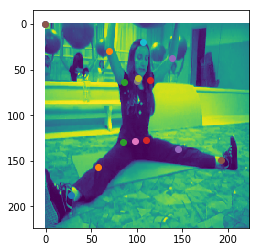

In [83]:
n=190
img = df['NAME'][n]
im = load_img('../MPII/'+img,target_size=(224,224))
img = img_to_array(im)
img_ = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

points = y_train2[n]
print(points)
i=0
plt.imshow(img_)
while i < 16:
    x = points[2*i]
    y = points[(2*i)+1]
    plt.scatter([[x]],[[y]])
    i=i+1


In [97]:
#imag(10)
X=image_data2

In [84]:
from keras.applications.resnet50 import ResNet50

In [86]:
base_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,1))
for layer in base_model.layers[:-7]:
    layer.trainable=False

for layer in base_model.layers:
    print(layer,layer.trainable)
print(base_model.summary())

ValueError: The input must have 3 channels; got `input_shape=(224, 224, 1)`

In [26]:
model=Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 36,437,024
Trainable params: 16,264,864
Non-trainable params: 20,172,160
_________________________________________________________________


In [65]:
# model.add(Convolution2D(32,(4,4),activation='relu',input_shape=(224,224,3)))

# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(64,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(128,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))


In [90]:
checkpoint=ModelCheckpoint('./base.model',
                          monitor='val_loss',
                          verbose=1,
                          save_best_only=True,
                          mode='max',
                          save_weights_only=False,
                          period=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=30,
                       verbose=1,
                       mode='auto')

tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1, 
    mode='auto',
    min_delta=0.0001, 
    cooldown=1, 
    min_lr=0.0001
)

callbacks = [checkpoint,tensorboard,earlystop,csvlogger,reduce]

In [28]:
opt=SGD(lr=1e-5,momentum=0.95)

model.compile(loss='mean_absolute_error',
             optimizer=opt,metrics=['mean_absolute_error'])

In [29]:
hist=model.fit(X,y_train2,epochs=10,shuffle=True,batch_size=2,validation_split=0.2,callbacks=callbacks)

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 1029s 429ms/step - loss: 60.0508 - mean_absolute_error: 60.0508 - val_loss: 80.2321 - val_mean_absolute_error: 80.2321

Epoch 00001: val_loss improved from -inf to 80.23214, saving model to ./base.model
Epoch 2/10
2400/2400 [==============================] - 751s 313ms/step - loss: 41.5027 - mean_absolute_error: 41.5027 - val_loss: 76.7029 - val_mean_absolute_error: 76.7029

Epoch 00002: val_loss did not improve from 80.23214
Epoch 3/10
2400/2400 [==============================] - 749s 312ms/step - loss: 38.8219 - mean_absolute_error: 38.8219 - val_loss: 72.7878 - val_mean_absolute_error: 72.7878

Epoch 00003: val_loss did not improve from 80.23214
Epoch 4/10
2400/2400 [==============================] - 746s 311ms/step - loss: 36.6633 - mean_absolute_error: 36.6633 - val_loss: 69.4905 - val_mean_absolute_error: 69.4905

Epoch 00004: val_loss did not improve from 80.23214
Epoch 5/10
24

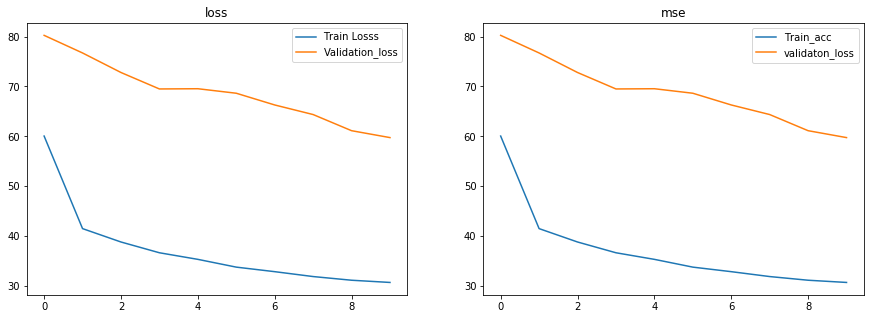

In [30]:
show_final_history(hist)                                                                                                       

In [62]:
# history=model.fit(X,y_train2,steps_per_epoch=50,
#                            validation_split=0.2,
#                            validation_steps=50,
#                            epochs=7,verbose=1,
#                            callbacks=callbacks)

Train on 160 samples, validate on 40 samples
Epoch 1/7
50/50 [==============================] - 434s 9s/step - loss: 0.8673 - mean_absolute_error: 0.8673 - val_loss: 0.5165 - val_mean_absolute_error: 0.5165

Epoch 00001: val_loss improved from -inf to 0.51650, saving model to ./base.model
Epoch 2/7
50/50 [==============================] - 402s 8s/step - loss: 0.7924 - mean_absolute_error: 0.7924 - val_loss: 0.5057 - val_mean_absolute_error: 0.5057

Epoch 00002: val_loss did not improve from 0.51650
Epoch 3/7
50/50 [==============================] - 434s 9s/step - loss: 0.7487 - mean_absolute_error: 0.7487 - val_loss: 0.4999 - val_mean_absolute_error: 0.4999

Epoch 00003: val_loss did not improve from 0.51650
Epoch 4/7
50/50 [==============================] - 447s 9s/step - loss: 0.7097 - mean_absolute_error: 0.7097 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963

Epoch 00004: val_loss did not improve from 0.51650
Epoch 5/7
50/50 [==============================] - 415s 8s/step - lo

In [32]:
# show_final_history(history) 

In [33]:
y_pred=model.predict(X[:10])


In [34]:
print(y_pred[0])
print(y_train2[0])

[35.334724 55.211853 44.41015  64.5031   48.45878  61.221268 55.203465
 59.632683 47.282177 63.572468 37.29875  57.117092 51.52275  58.85042
 51.453064 38.433243 50.470814 34.64647  52.04537  24.30547  48.602093
 52.991425 47.27602  50.189228 47.66206  37.80191  52.94969  37.954796
 54.97702  49.889072 53.72239  52.3285  ]
[108.5      122.577774 107.8       83.68889  100.275     57.555557
 113.225     58.488888 115.675     68.755554 114.8       71.86667
 106.75      58.177776 113.225     54.755554 111.478516  59.05458
 121.796486  33.65653  106.05      67.51111   96.775     50.08889
 105.175     51.955555 121.1       57.555557 121.275     74.666664
 120.4       97.37778 ]


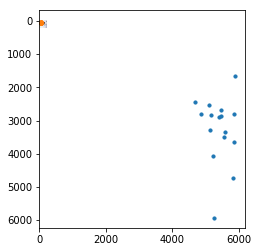

In [41]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)

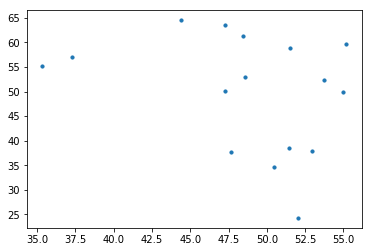

In [40]:
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)

In [106]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
#
import tensorflow

In [110]:
model1 = Sequential()
model1.add(Convolution2D(32,(3,3),activation='relu', input_shape=(224,224,1)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.1))
model1.add(Convolution2D(64, (2,2), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.25))
model1.add(Convolution2D(128,(2,2),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(500,activation='relu'))
model1.add(Dense(500,activation='relu'))
model1.add(Dense(32,activation='linear'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 110, 110, 64)      8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 54, 54, 128)       32896     
__________

In [111]:
model1.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

hist1=model1.fit(X,y_train2,epochs=20,shuffle=True,batch_size=2,validation_split=0.2,callbacks=callbacks)

ValueError: Error when checking input: expected conv2d_16_input to have 4 dimensions, but got array with shape (3000, 224, 224)

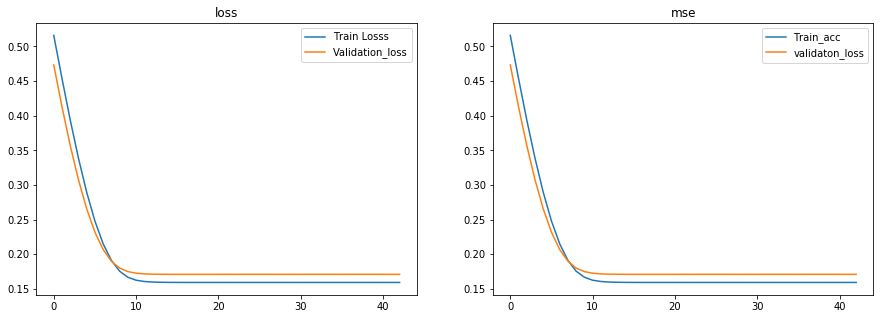

In [30]:
show_final_history(hist1)

In [33]:
y_pred=model1.predict(X[:10])

In [37]:
y_train2[0]

array([-0.515625  , -0.45277777, -0.51875   , -0.6263889 , -0.5523437 ,
       -0.7430556 , -0.49453124, -0.73888886, -0.48359376, -0.69305557,
       -0.4875    , -0.6791667 , -0.5234375 , -0.74027777, -0.49453124,
       -0.75555557, -0.50232804, -0.7363635 , -0.45626572, -0.84974766,
       -0.5265625 , -0.69861114, -0.5679687 , -0.7763889 , -0.53046876,
       -0.76805556, -0.459375  , -0.7430556 , -0.45859376, -0.6666667 ,
       -0.4625    , -0.56527776], dtype=float32)

In [36]:
y_pred[0]

array([-0.659154  , -0.34682885, -0.5911691 , -0.37221885, -0.5459085 ,
       -0.42939147, -0.50081   , -0.42848346, -0.546587  , -0.37196857,
       -0.6363921 , -0.34510857, -0.5234307 , -0.42990324, -0.51753926,
       -0.64261043, -0.5176599 , -0.6742822 , -0.5188664 , -0.8125866 ,
       -0.5570531 , -0.48716623, -0.5690938 , -0.52651143, -0.55707955,
       -0.6427675 , -0.4864606 , -0.6445044 , -0.47527105, -0.52508914,
       -0.4851787 , -0.4846713 ], dtype=float32)

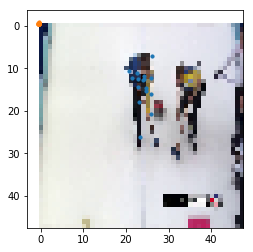

In [38]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)